# Task1

In [278]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn.preprocessing as pp
from sklearn.model_selection import train_test_split

In [279]:
#importing dataset
df=pd.read_csv("DS2_C6_S1_Insurance_Data_Challenge.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Task2

In [280]:
#shape of our dataset
df.shape

(1338, 7)

In [281]:
#names of columns
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [282]:
#summarizing dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


# Task3

In [284]:
#checking null values

In [285]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [286]:
#there are no null values in our dataset
#lets check for any unrelated/noise in our dataset

In [287]:
cat=df.select_dtypes(include=object)

In [288]:
l=cat.columns.to_list()

In [289]:
for i in l:
    print("---",i,"---")
    print(cat[i].value_counts(),"\n")

--- sex ---
male      676
female    662
Name: sex, dtype: int64 

--- smoker ---
no     1064
yes     274
Name: smoker, dtype: int64 

--- region ---
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64 



In [290]:
#there are no meaningless data in our dataset.

# Task4

In [291]:
#conversion of non numeric into categorical type and then converting in into numeric using label encoding technique
#and also data scaling for unifromity

In [292]:
#df1 for further visualization
df1=df.copy()

In [293]:
#checking data types of different columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [294]:
def lable_encoding_and_scaling(df):
    l=df.select_dtypes(include=object).columns.to_list()
    df[l]=df[l].astype("category")
    for i in l:
        df[i]=pp.LabelEncoder().fit_transform(df[i])
    df=pd.DataFrame(pp.MinMaxScaler().fit_transform(df),columns=df.columns)
    return df

In [295]:
df=lable_encoding_and_scaling(df)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816


In [296]:
#correlation matrix for feature selection
c=df.corr()

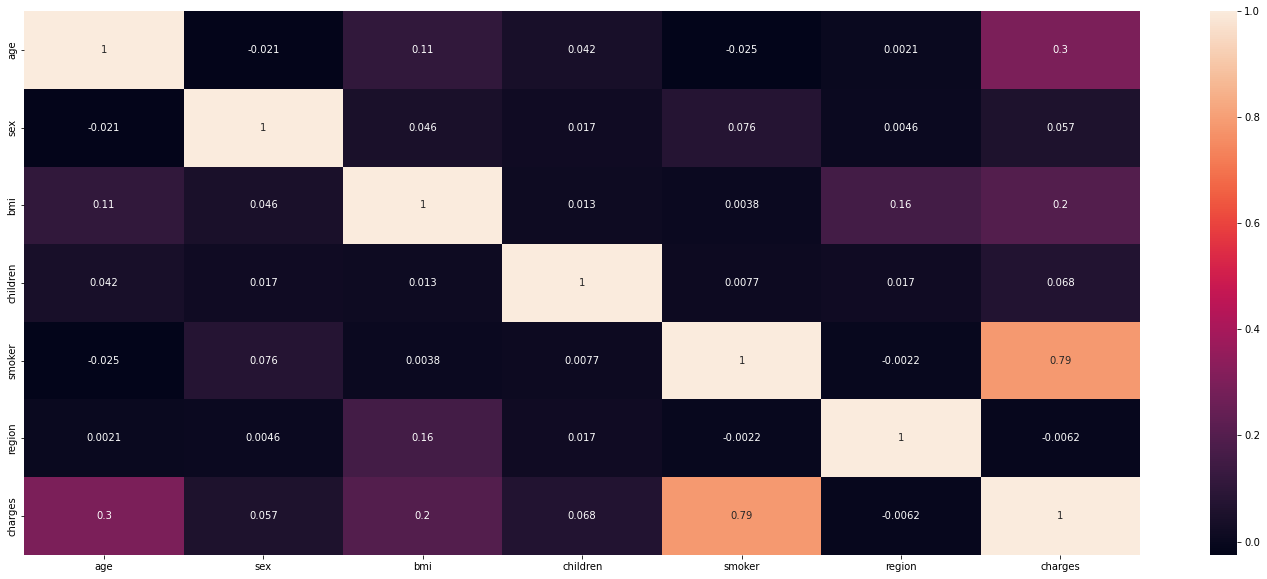

In [297]:
plt.figure(figsize=(25,10))
sb.heatmap(c,annot=True)
plt.show()

In [298]:
#our target column i.e. dependent variable is charges.rest are independent features
#Target is highly correlated with smoker feature with r=0.79
#other two features that are also correlated are age&bmi
#we can use these features for  modelling purpose

# Task5

In [299]:
#splitting data into train and test using row index method with the ratio of 70:30

In [300]:
df_train=df.iloc[:int(len(df)*0.7),:]
df_test=df.iloc[int(len(df)*0.7):,:]

In [301]:
df_train.head()

,age,sex,bmi,children,smoker,region,charges
0,0.021739,0.0,0.321227,0.0,1.0,1.000000,0.251611
1,0.000000,1.0,0.479150,0.2,0.0,0.666667,0.009636
2,0.217391,1.0,0.458434,0.6,0.0,0.666667,0.053115
3,0.326087,1.0,0.181464,0.0,0.0,0.333333,0.333010
4,0.304348,1.0,0.347592,0.0,0.0,0.333333,0.043816


In [302]:
df_test.head()

,age,sex,bmi,children,smoker,region,charges
936,0.565217,1.0,0.370595,0.4,0.0,0.000000,0.494613
937,0.456522,0.0,0.222357,1.0,0.0,0.333333,0.125205
938,0.000000,1.0,0.274953,0.4,0.0,0.666667,0.018869
939,0.760870,1.0,0.363734,0.0,0.0,0.666667,0.133535
940,0.000000,1.0,0.195050,0.0,0.0,0.666667,0.000000


In [303]:
#splitting using builtin method in ratio of 70:30

In [304]:
x,y=df.iloc[:,:-1],df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=30)
x_train

,age,sex,bmi,children,smoker,region
1077,0.065217,1.0,0.270917,0.0,0.0,0.000000
61,0.152174,1.0,0.476190,0.8,0.0,0.666667
796,0.260870,1.0,0.760291,0.4,0.0,0.666667
1061,0.847826,1.0,0.322303,0.2,0.0,0.666667
69,0.217391,1.0,0.215765,0.6,1.0,0.666667
...,...,...,...,...,...,...
919,0.369565,0.0,0.490987,0.2,0.0,0.666667
1164,0.500000,0.0,0.332257,0.2,0.0,0.333333
500,0.239130,1.0,0.496099,0.0,1.0,1.000000
941,0.695652,0.0,0.810600,0.2,0.0,0.666667


# Task6:Visualization

In [ ]:
#univariate analysis of all columns

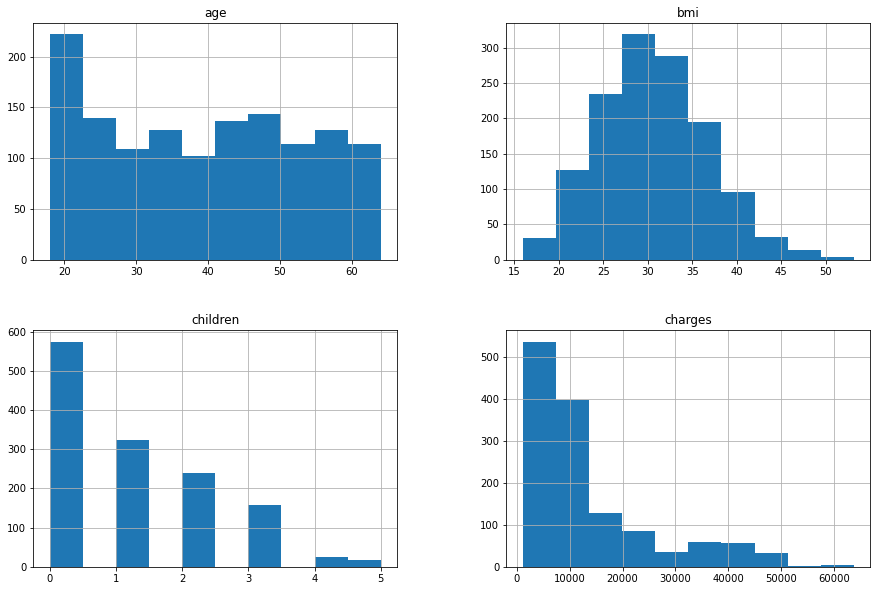

In [305]:
#distribution of age,bmi,children and charges
df1.hist(figsize=(15,10))
plt.show()

In [ ]:
#bmi is normally distributed while age bin of 30 has more frequency.
#children count of 0 is high and charges<10000 is more prominent

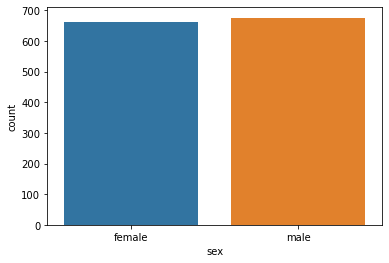

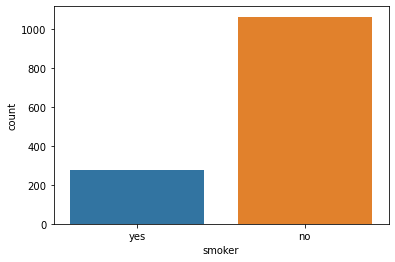

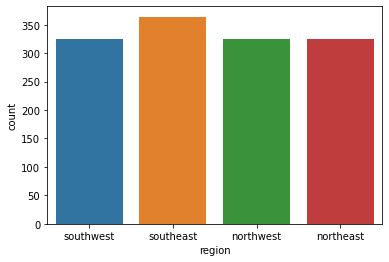

In [310]:
for i,j in enumerate(l):
    plt.figure(i)
    sb.countplot(data=df1,x=j)
    plt.show()

In [ ]:
#males are more than females
#non smokers are more
#all regions have similar counts but southeast is leading

In [ ]:
#bivariate analysis wrt target column on selected features:age,smoker,bmi

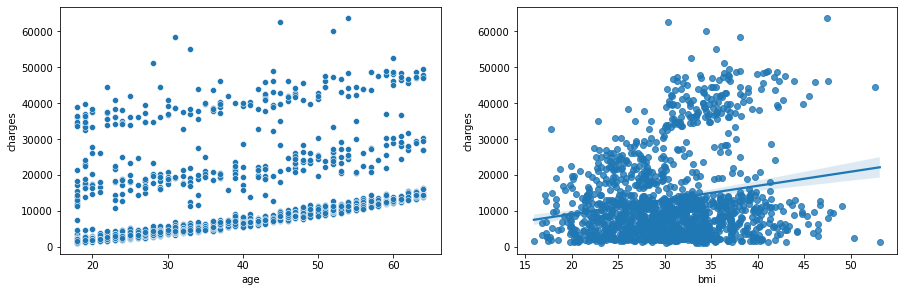

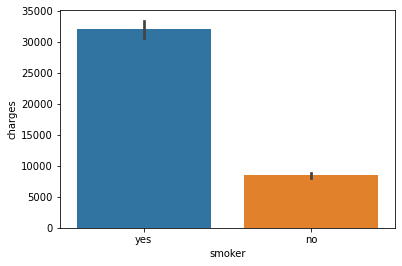

In [331]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sb.scatterplot(data=df1,x="age",y="charges")
plt.subplot(222)
sb.regplot(data=df1,x="bmi",y="charges")
plt.show(223)
sb.barplot(data=df1,x="smoker",y="charges")
plt.show()

In [ ]:
#from first correlation graph we can see age and charges are positevely correlated
#from second graph we can see bmi and charges are also positelvely correlated
#smoker has high mean charges compared to non smokers